✅ Data loaded successfully!
    OrderDate Region   Product  Quantity  UnitPrice SalesPerson
0  2025-01-03   East  Notebook         5      15.99       Alice
1  2025-01-05   West       Pen        20       1.99         Bob
2  2025-01-06  South   Monitor         2     199.99     Charlie
3  2025-01-08  North     Mouse        10      12.49       Diana
4  2025-01-10   East  Keyboard         3      49.99       Alice

🧮 Summary Statistics:
                 OrderDate    Quantity    UnitPrice  Month    Year  \
count                   16   16.000000    16.000000   16.0    16.0   
mean   2025-01-17 01:30:00   14.312500   176.501250    1.0  2025.0   
min    2025-01-03 00:00:00    1.000000     1.890000    1.0  2025.0   
25%    2025-01-09 12:00:00    2.000000    12.215000    1.0  2025.0   
50%    2025-01-17 00:00:00    5.500000    15.745000    1.0  2025.0   
75%    2025-01-25 06:00:00   10.000000   192.490000    1.0  2025.0   
max    2025-01-31 00:00:00  100.000000  1049.990000    1.0  2025.0   
std  

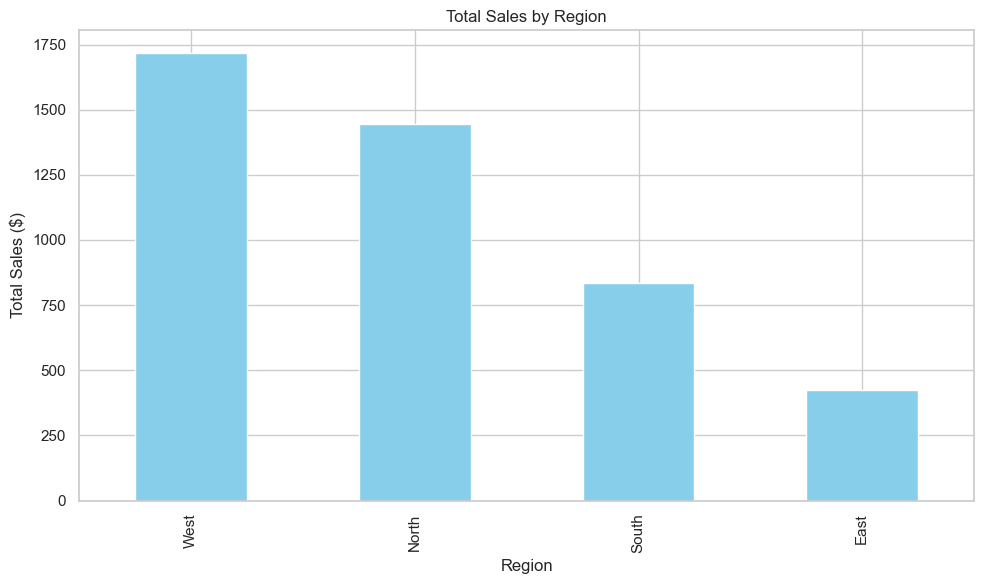


📦 Top Products by Revenue:
Product
Laptop      2049.98
Monitor     1169.94
Notebook     338.35
Pen          329.30
Mouse        295.16
Keyboard     239.97
Name: Total, dtype: float64


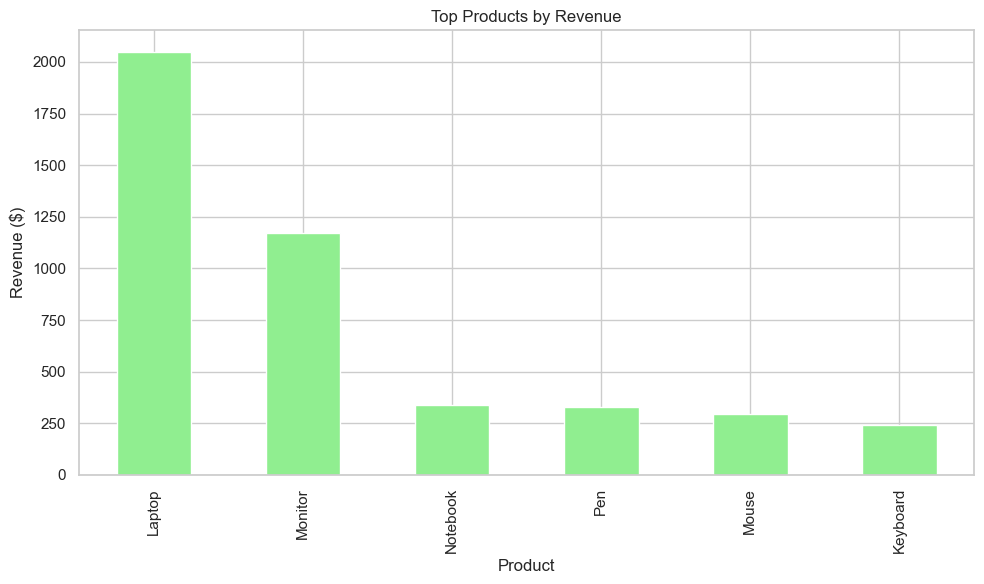


👩‍💼 Sales by SalesPerson:
SalesPerson
Alice       422.74
Bob        1718.26
Charlie     834.88
Diana      1446.82
Name: Total, dtype: float64


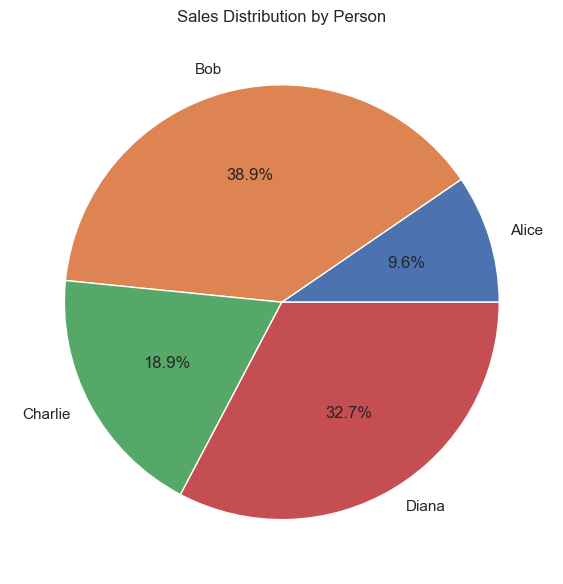

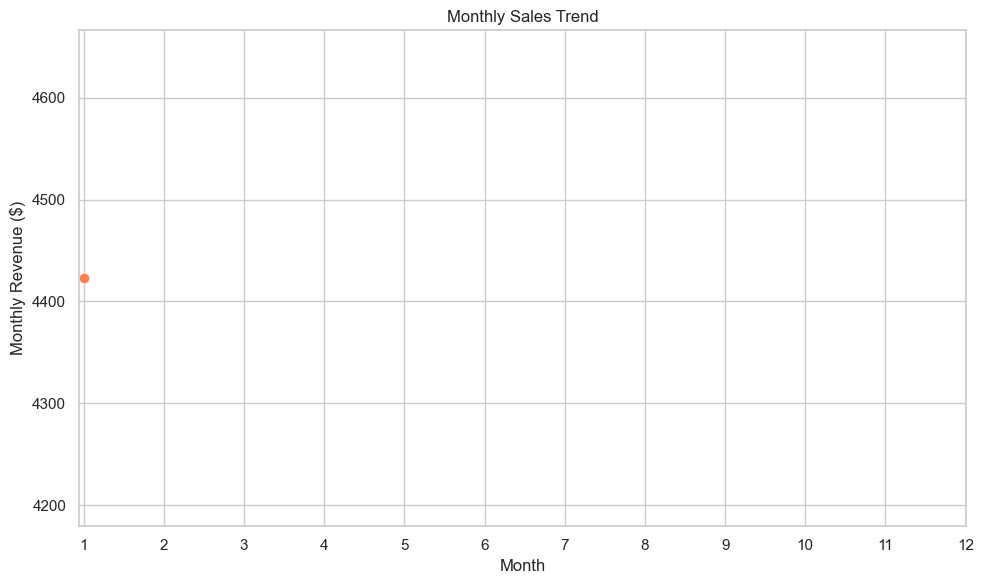


✅ Cleaned data saved as 'sales_cleaned.csv'


In [ ]:
# 📊 Sales Data Analysis Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Load Dataset
df = pd.read_csv("data/sales.csv")
print("✅ Data loaded successfully!")

# 2️⃣ Preview Data
print(df.head())

# 3️⃣ Convert OrderDate to datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["Month"] = df["OrderDate"].dt.month
df["Year"] = df["OrderDate"].dt.year

# 4️⃣ Calculate Total = Quantity * UnitPrice
df["Total"] = df["Quantity"] * df["UnitPrice"]

# 5️⃣ Basic Statistics
print("\n🧮 Summary Statistics:")
print(df.describe())

# 6️⃣ Sales by Region
sales_by_region = df.groupby("Region")["Total"].sum().sort_values(ascending=False)
print("\n💰 Total Sales by Region:")
print(sales_by_region)

# Plot Sales by Region
sales_by_region.plot(kind="bar", color="skyblue", title="Total Sales by Region")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.savefig("plots/sales_by_region.png")
plt.show()

# 7️⃣ Top Products
top_products = df.groupby("Product")["Total"].sum().sort_values(ascending=False)
print("\n📦 Top Products by Revenue:")
print(top_products)

# Plot Top Products
top_products.plot(kind="bar", color="lightgreen", title="Top Products by Revenue")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("plots/top_products.png")
plt.show()

# 8️⃣ Sales by SalesPerson
sales_by_person = df.groupby("SalesPerson")["Total"].sum()
print("\n👩‍💼 Sales by SalesPerson:")
print(sales_by_person)

# Plot Sales by SalesPerson
sales_by_person.plot(kind="pie", autopct="%.1f%%", title="Sales Distribution by Person")
plt.ylabel("")
plt.tight_layout()
plt.savefig("plots/sales_by_person.png")
plt.show()

# 9️⃣ Monthly Trend
monthly_trend = df.groupby("Month")["Total"].sum()
monthly_trend.plot(kind="line", marker="o", title="Monthly Sales Trend", color="coral")
plt.ylabel("Monthly Revenue ($)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.savefig("plots/monthly_trend.png")
plt.show()

# 🔟 Export Cleaned Data
df.to_csv("data/sales_cleaned.csv", index=False)
print("\n✅ Cleaned data saved as 'sales_cleaned.csv'")
